# Perceptron from scratch

$\hat{y} = f(\vec{w}\cdot \vec{x} + b) = f(w_1 x_1 + w_2 x_2 + \dots + w_nx_n + b)$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from perceptron import Perceptron

In [2]:
data = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))
data.head()

,x1,x2
0,0.741060,0.848300
1,0.863622,0.652026
2,0.307873,0.648733
3,0.225980,0.100641
4,0.652385,0.641178


In [3]:
def compute_y(inputs):
    print(inputs)
    y = int(np.sum(inputs) > 1)
    return y
data['y'] = data.apply(compute_y, axis=1)
data.head()

x1    0.74106
x2    0.84830
Name: 0, dtype: float64
x1    0.863622
x2    0.652026
Name: 1, dtype: float64
x1    0.307873
x2    0.648733
Name: 2, dtype: float64
x1    0.225980
x2    0.100641
Name: 3, dtype: float64
x1    0.652385
x2    0.641178
Name: 4, dtype: float64
x1    0.231653
x2    0.389192
Name: 5, dtype: float64
x1    0.106884
x2    0.517985
Name: 6, dtype: float64
x1    0.633748
x2    0.637231
Name: 7, dtype: float64
x1    0.373760
x2    0.610835
Name: 8, dtype: float64
x1    0.881138
x2    0.656283
Name: 9, dtype: float64
x1    0.053261
x2    0.740758
Name: 10, dtype: float64
x1    0.530707
x2    0.380209
Name: 11, dtype: float64
x1    0.211319
x2    0.468481
Name: 12, dtype: float64
x1    0.468400
x2    0.787477
Name: 13, dtype: float64
x1    0.893515
x2    0.066583
Name: 14, dtype: float64
x1    0.123279
x2    0.724854
Name: 15, dtype: float64
x1    0.200162
x2    0.086205
Name: 16, dtype: float64
x1    0.760403
x2    0.691847
Name: 17, dtype: float64
x1    0.220984
x2    0

,x1,x2,y
0,0.741060,0.848300,1
1,0.863622,0.652026,1
2,0.307873,0.648733,0
3,0.225980,0.100641,0
4,0.652385,0.641178,1


In [4]:
def compute_y(inputs):
    print(inputs)
    y = int(np.sum(inputs) > 1)
    return y
data['y'] = data.apply(compute_y, axis=1)

x1    0.74106
x2    0.84830
y     1.00000
Name: 0, dtype: float64
x1    0.863622
x2    0.652026
y     1.000000
Name: 1, dtype: float64
x1    0.307873
x2    0.648733
y     0.000000
Name: 2, dtype: float64
x1    0.225980
x2    0.100641
y     0.000000
Name: 3, dtype: float64
x1    0.652385
x2    0.641178
y     1.000000
Name: 4, dtype: float64
x1    0.231653
x2    0.389192
y     0.000000
Name: 5, dtype: float64
x1    0.106884
x2    0.517985
y     0.000000
Name: 6, dtype: float64
x1    0.633748
x2    0.637231
y     1.000000
Name: 7, dtype: float64
x1    0.373760
x2    0.610835
y     0.000000
Name: 8, dtype: float64
x1    0.881138
x2    0.656283
y     1.000000
Name: 9, dtype: float64
x1    0.053261
x2    0.740758
y     0.000000
Name: 10, dtype: float64
x1    0.530707
x2    0.380209
y     0.000000
Name: 11, dtype: float64
x1    0.211319
x2    0.468481
y     0.000000
Name: 12, dtype: float64
x1    0.468400
x2    0.787477
y     1.000000
Name: 13, dtype: float64
x1    0.893515
x2    0.066583
y  

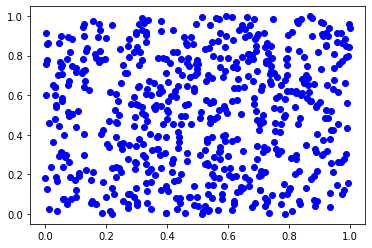

In [5]:
plt.scatter(data.x1, data.x2, color='blue')
#data[data.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
#data[data.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')

In [6]:
InitialWeights = [0.1, 0.1]
InitialBias = 0.01
LearningRate = 0.1
neural_network = Perceptron(InitialWeights, InitialBias, LearningRate)

In [9]:
X = np.array(data.loc[:,['x1', 'x2']])
y = np.array(data['y'])

In [10]:
neural_network.Learning(inputs=X, output=y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Multilayer perceptron

How does Multilayer Perceptron work?
We can summarize the operation of the perceptron as follows it:

- Step 1: Initialize the weights and bias with small-randomized values;
- Step 2: Propagate all values in the input layer until output layer (Forward Propagation)
- Step 3: Update weight and bias in the inner layers (Backpropagation)
- Step 4: Do it until that the stop criterion is satisfied !